# 0. Imports

## 0.1. Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder

## 0.2. Helper Functions

In [2]:
# Save intermediate dataset
def save_interim(dataframe, file_name):
   dataframe.to_csv('../data/interim/'+file_name+'.zip', index=False, compression= 'zip')

# Load intermediate dataset
def load_interim(file_name):
   return pd.read_csv('../data/interim/'+file_name, compression='zip')

## 0.2. Loading Dataset

In [3]:
df_raw = pd.read_csv('/home/ezequiel/Documentos/Comunidade_DS/health_insurance_cross_sell/data/raw/train.csv')
df1 = df_raw.copy()

In [4]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df1.columns = df1.columns.str.lower()

In [6]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

# 1. Data Description

## 1.1. Data Dimension

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


## 1.2. Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   driving_license       381109 non-null  int64  
 4   region_code           381109 non-null  float64
 5   previously_insured    381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   annual_premium        381109 non-null  float64
 9   policy_sales_channel  381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 1.4. Data Description

### 1.4.1. Categorical variables

In [10]:
cat_attributes = df1.select_dtypes(include='object')
cat_attributes.value_counts()

gender  vehicle_age  vehicle_damage
Male    1-2 Year     Yes               79533
Female  < 1 Year     No                66047
Male    < 1 Year     No                50543
Female  1-2 Year     Yes               48692
Male    1-2 Year     No                42791
Female  1-2 Year     No                29300
        < 1 Year     Yes               25274
Male    < 1 Year     Yes               22922
        > 2 Years    Yes               10293
Female  > 2 Years    Yes                5699
                     No                    8
Male    > 2 Years    No                    7
Name: count, dtype: int64

### 1.4.2. Numerical variables

In [11]:
num_attributes = df1.select_dtypes(exclude='object')
df_describe = num_attributes.describe().T
df_describe['kurtosis'] = num_attributes.kurtosis()
df_describe['skewness'] = num_attributes.skew()

In [12]:
df_describe

,count,mean,std,min,25%,50%,75%,max,kurtosis,skewness
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0,-1.200000,9.443274e-16
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0,-0.565655,6.725390e-01
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0,464.354302,-2.159518e+01
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0,-0.867857,-1.152664e-01
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0,-1.971871,1.677471e-01
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0,34.004569,1.766087e+00
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0,-0.970810,-9.000081e-01
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0,-1.200688,3.029517e-03
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0,3.298788,2.301906e+00


In [13]:
save_interim(df1, 'train_df1.csv')

# 2. Feature Engeneering

In [14]:
df1['vehicle_age'] = df1['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else
                                              'between_1_2_years' if x == '1-2 Year' else
                                              'below_1_year')

df1['vehicle_damage'] = df1['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_years,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0


In [16]:
save_interim(df1, 'train_df2.csv')

# 3. Data Filtering

# 4. Exploration Data Analysis (EDA)

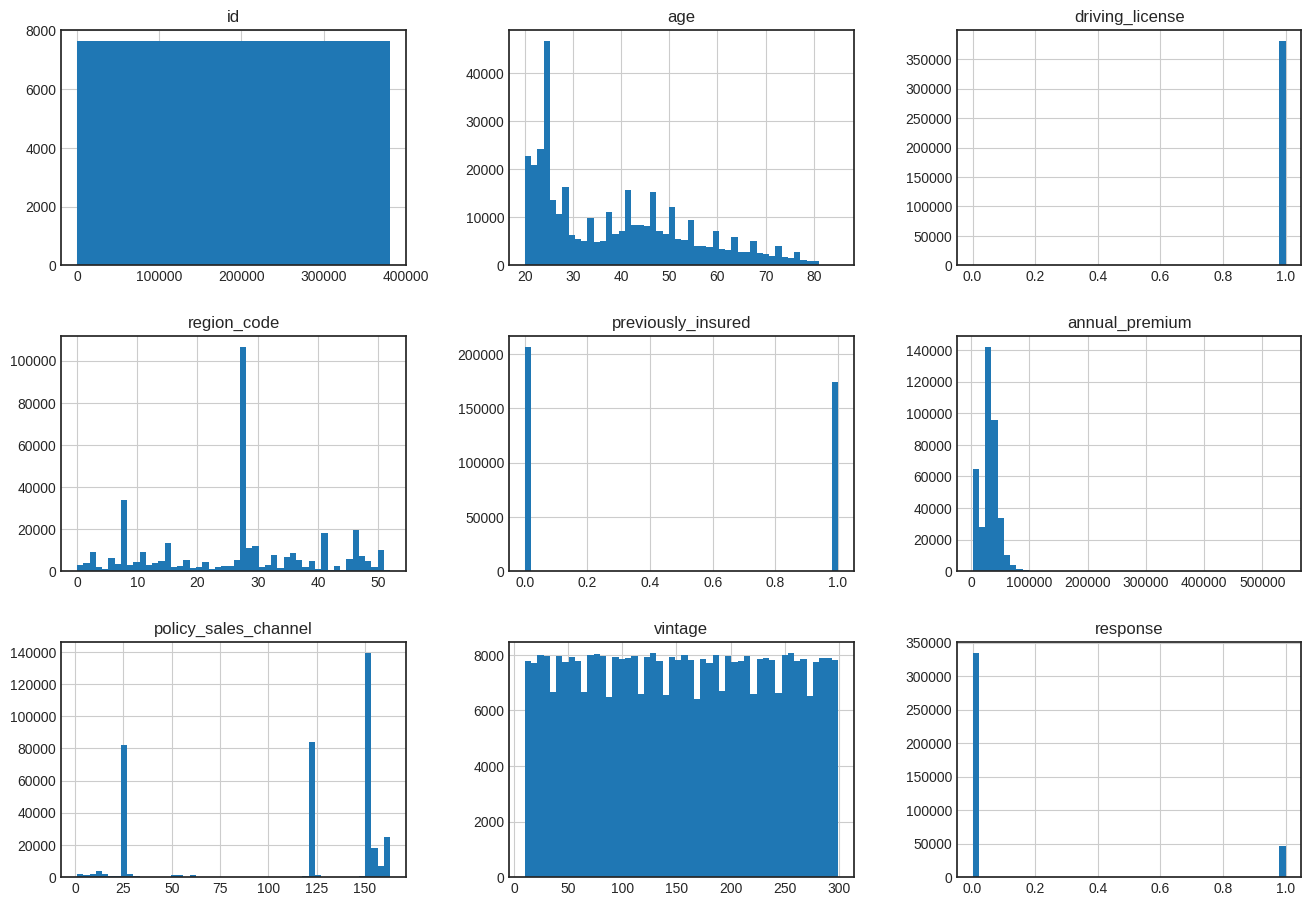

In [17]:
num_attributes.hist(bins=50, figsize=(16,11));

In [18]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 4.1. Univariate Analisys

<Axes: xlabel='age', ylabel='Count'>

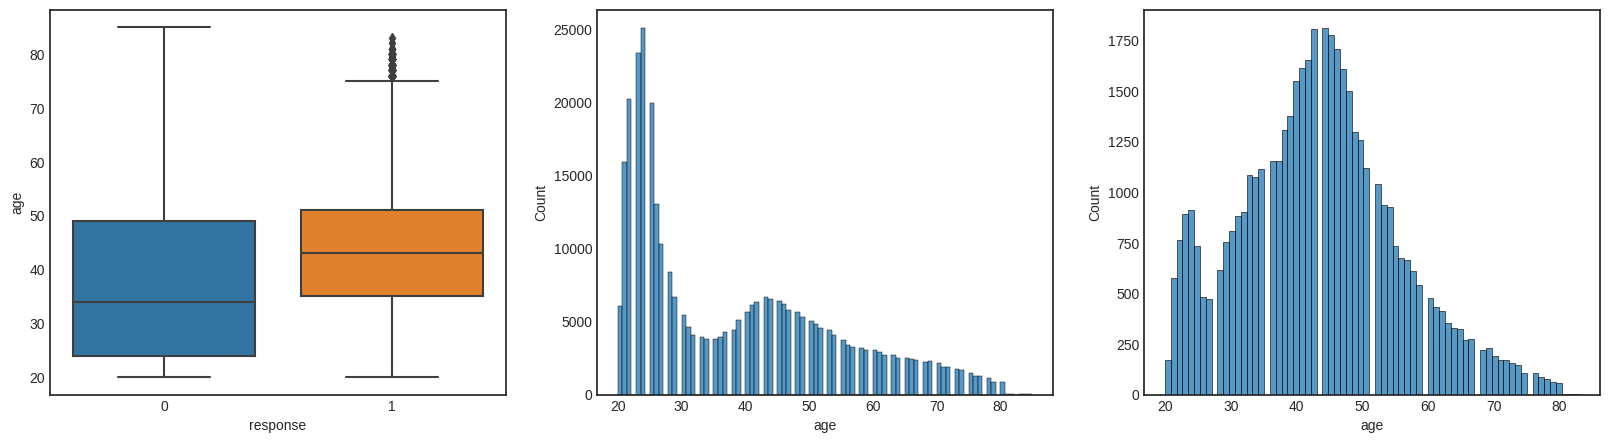

In [19]:
# age
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(ax=ax[0], x='response', y='age', data=df1)
sns.histplot(df1.loc[df1['response'] == 0, 'age'], ax=ax[1])
sns.histplot(df1.loc[df1['response'] == 1, 'age'], ax=ax[2])
#ax[1].hist(df1.loc[df1['response'] == 0, 'age'])

# A idade é representativa, porém o atributo response tem classes desbalanceadas

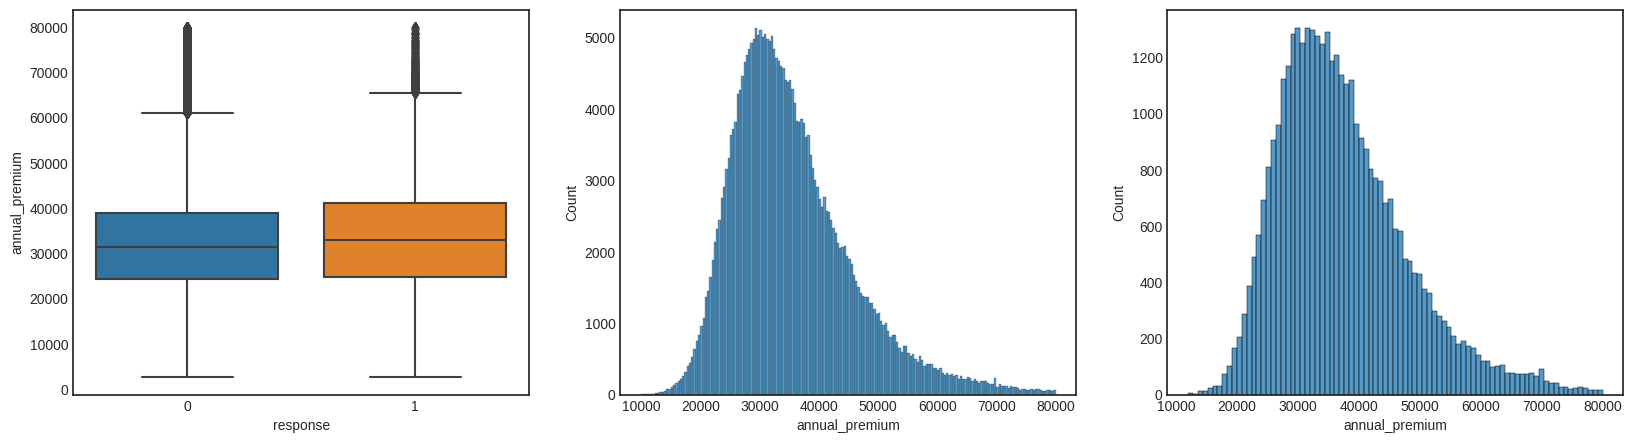

In [20]:
# annual_premium
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(ax=ax[0], x='response', y='annual_premium', data=df1.loc[df1['annual_premium'] < 80000])
sns.histplot(df1.loc[(df1['response'] == 0) & (df1['annual_premium'] > 10000) & (df1['annual_premium'] < 80000), 'annual_premium'], ax=ax[1])
sns.histplot(df1.loc[(df1['response'] == 1) & (df1['annual_premium'] > 10000) & (df1['annual_premium'] < 80000), 'annual_premium'], ax=ax[2]);

# Aparentemente não há distinção entre as classes de response quando se compara annual_premium

In [21]:
# driving_license
df1[['driving_license', 'response']].value_counts()

driving_license  response
1                0           333628
                 1            46669
0                0              771
                 1               41
Name: count, dtype: int64

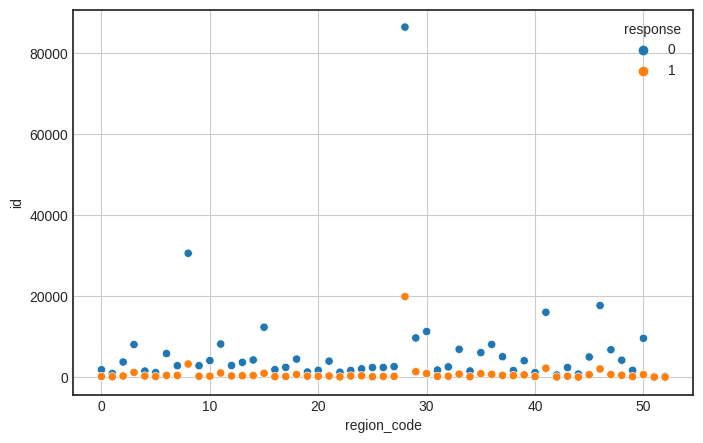

In [22]:
# region_code
aux = df1[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=aux, x='region_code', y='id', hue='response')
plt.grid()

# region_code, aparentemente, não é capaz de explicar response

In [23]:
# previously_insured
pd.crosstab(df1['previously_insured'], df1['response'], normalize='index')      # normalizar pelo index retorna o percentual da coluna sobre o total de cada linha

# previously_insured praticamente replica a variável resposta. Não é bom para treinar o modelo

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [24]:
# vehicle_age
df1[['vehicle_age', 'response']].value_counts(normalize=True, sort=False).reset_index()

,vehicle_age,response,proportion
0,below_1_year,0,0.413488
1,below_1_year,1,0.018897
2,between_1_2_years,0,0.434285
3,between_1_2_years,1,0.091328
4,over_2_years,0,0.029663
5,over_2_years,1,0.012338


In [25]:
# policy_sales_channel

aux = pd.crosstab(df1['policy_sales_channel'], df1['response'], normalize='index')

<Axes: xlabel='policy_sales_channel'>

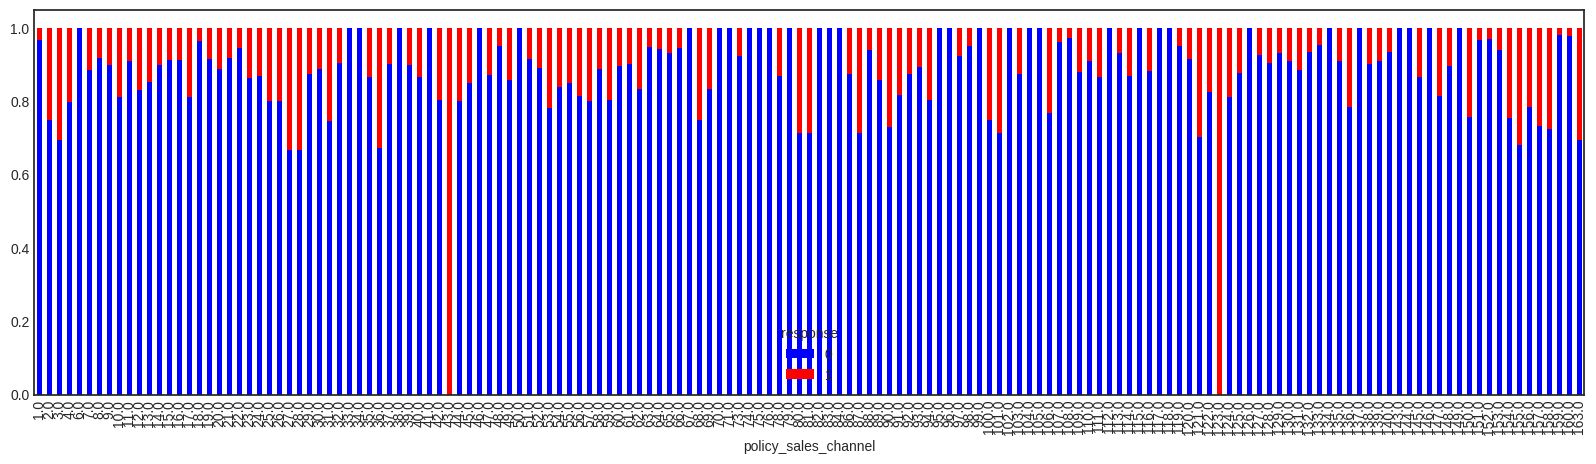

In [26]:
aux.plot(kind='bar', stacked=True, figsize=(20,5), colormap='bwr')

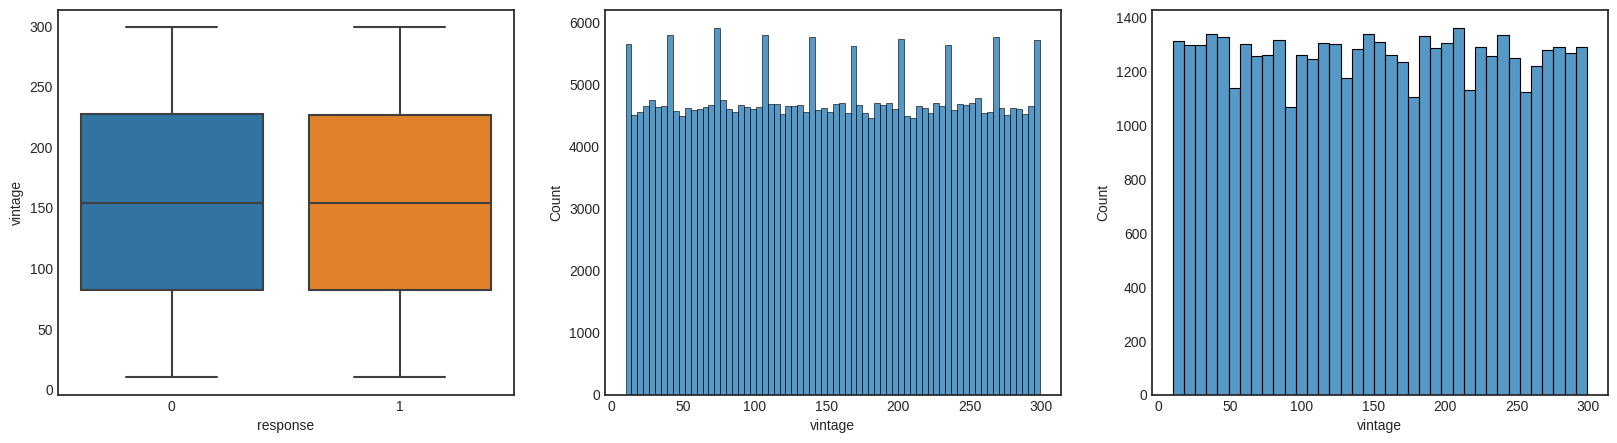

In [27]:
# vintage

fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(ax=ax[0], x='response', y='vintage', data=df1)
sns.histplot(df1.loc[df1['response'] == 0, 'vintage'], ax=ax[1])
sns.histplot(df1.loc[df1['response'] == 1, 'vintage'], ax=ax[2]);

In [28]:
# gender

In [29]:
# vehicle_damage

# 5. Data Preparation

In [30]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 5.1. Standardization

- Ideal para dados que se aproximam de uma distribuição normal

In [34]:
# annual_premiuim
std_scaler = StandardScaler()

df1['annual_premium'] = std_scaler.fit_transform(df1[['annual_premium']])

## 5.2. Rescaling

- Quando os dados não apresentam distribuição normal

In [42]:
# age
mms_age = MinMaxScaler()
df1['age'] = mms_age.fit_transform(df1[['age']])

# vintage
mms_vintage = MinMaxScaler()
df1['vintage'] = mms_vintage.fit_transform(df1[['vintage']])

## 5.3. Encoder

In [48]:
# region_code - target encoder
tar_enc = TargetEncoder()
df1['region_code'] = tar_enc.fit_transform(df1[['region_code']], df1['response'])

# vehicle_age - one hot encoder / order encoder / frequency encoder
# policy_sales_channel - frequency enconder

In [50]:
df1.describe()

,id,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,3.811090e+05,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.289578,0.997869,0.122559,0.458210,0.504877,1.383391e-17,112.034295,0.499472,0.122563
std,110016.836208,0.238640,0.046110,0.045311,0.498251,0.499977,1.000001e+00,54.203995,0.289520,0.327936
min,1.000000,0.000000,0.000000,0.038865,0.000000,0.000000,-1.622853e+00,1.000000,0.000000,0.000000
25%,95278.000000,0.076923,1.000000,0.086673,0.000000,0.000000,-3.578308e-01,29.000000,0.249135,0.000000
50%,190555.000000,0.246154,1.000000,0.111339,0.000000,1.000000,6.417254e-02,133.000000,0.498270,0.000000
75%,285832.000000,0.446154,1.000000,0.186510,1.000000,1.000000,5.133064e-01,152.000000,0.750865,0.000000
max,381109.000000,1.000000,1.000000,0.200421,1.000000,1.000000,2.960534e+01,163.000000,1.000000,1.000000


In [45]:
df1.groupby('region_code')['response'].mean()

region_code
0.0     0.086096
1.0     0.108135
2.0     0.071075
3.0     0.127662
4.0     0.158245
5.0     0.115715
6.0     0.069904
7.0     0.131747
8.0     0.096142
9.0     0.081587
10.0    0.060128
11.0    0.112760
12.0    0.097561
13.0    0.090188
14.0    0.090209
15.0    0.071987
16.0    0.066766
17.0    0.070310
18.0    0.131574
19.0    0.162866
20.0    0.115245
21.0    0.071027
22.0    0.063407
23.0    0.153061
24.0    0.141615
25.0    0.042749
26.0    0.072284
27.0    0.074035
28.0    0.187163
29.0    0.123362
30.0    0.073825
31.0    0.100510
32.0    0.085755
33.0    0.099294
34.0    0.075721
35.0    0.124604
36.0    0.079914
37.0    0.079258
38.0    0.192004
39.0    0.123600
40.0    0.118147
41.0    0.121776
42.0    0.074450
43.0    0.092459
44.0    0.040842
45.0    0.109723
46.0    0.102891
47.0    0.087682
48.0    0.101901
49.0    0.074782
50.0    0.062677
51.0    0.153005
52.0    0.123596
Name: response, dtype: float64

# 6. Feature Selection

# 7. Machine Learing